## 텐서플로 라이브러리 임포트 

In [3]:
import tensorflow as tf

## 데이터 준비
- misnit x 데이터 세트의 구성 : 60000개의 너비 28 높이 28
- misnit y 데이터 세트의 구성 : 60000개로 구성 

In [4]:
mnist=tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test)=mnist.load_data()

In [5]:
x_train.shape 

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [9]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# 이미지 글씨 확인

7

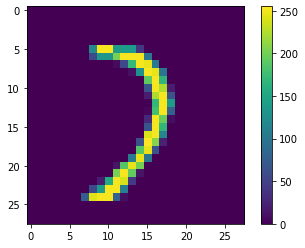

In [5]:
import matplotlib.pyplot as plt


plt.figure()
plt.imshow(x_train[140])
plt.colorbar()
plt.grid(False)

y_train[140]

In [20]:
def draw_train(no):
    plt.imshow(x_train[no])
    plt.colorbar()
    plt.grid(False)

    y_train[no]
    
def draw_test(no):
    plt.imshow(x_test[no])
    plt.colorbar()
    plt.grid(False)

    y_test[no]

# 데이터 전처리
- 픽셀값 범위 0-255 -> 0-1로 변경
- 드롭아웃 : 드롭아웃은 개념적으로는 이해하기 쉬운 것이다. 신경망 모델이 복잡해질 때 가중치 감소만으로는 어려운데 드롭아웃 기법은 뉴런의 연결을 임의로 삭제하는 것이다. 드롭아웃은 학습할 때 뉴런을 무작위로 학습해 매번 다른 모델들을 학습시킨다는 측면에서 앙상블 기법과 유사하다.
- sparse_categorical_crossentropy : 샘플 값이 정수 자료 

In [33]:
x_train,x_test=x_train/255.0,x_test/255.0

In [34]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',  
             metrics=['accuracy'])

# 모델 훈련 및 평가

In [35]:
model.fit(x_train, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 6ms/step - loss: 1.7299 - accuracy: 0.5475
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6261 - accuracy: 0.8304
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4716 - accuracy: 0.8670
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4041 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3682 - accuracy: 0.8940


In [36]:
model.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 2s 4ms/step - loss: 0.3099 - accuracy: 0.9120


[0.309917151927948, 0.9120000004768372]

In [37]:
pred=model.predict(x_test)

In [40]:
import numpy as np
np.argmax(pred[0])

7

In [41]:
pred

array([[7.0402508e-05, 3.1910946e-07, 7.8471472e-05, ..., 9.9677569e-01,
        1.9216457e-05, 2.2005248e-03],
       [2.1586607e-03, 5.2750405e-05, 9.4078141e-01, ..., 6.7988482e-09,
        8.6532114e-03, 2.6288163e-08],
       [3.8006879e-06, 9.7271967e-01, 7.2043855e-03, ..., 6.8182144e-03,
        3.3749309e-03, 9.3931938e-04],
       ...,
       [2.9906325e-06, 1.0618459e-05, 8.0600483e-05, ..., 3.8925814e-03,
        2.0150866e-02, 1.8842934e-01],
       [3.7275581e-03, 2.6355457e-04, 5.8346364e-04, ..., 8.9267625e-05,
        2.5689843e-01, 4.2645322e-04],
       [3.7827124e-04, 1.3936651e-09, 9.1438257e-04, ..., 8.2062124e-10,
        1.6672961e-05, 4.3901176e-07]], dtype=float32)

In [42]:
pred.shape

(10000, 10)

In [43]:
pred[0]

array([7.0402508e-05, 3.1910946e-07, 7.8471472e-05, 7.8560773e-04,
       1.3687024e-06, 6.8320915e-05, 5.0160800e-09, 9.9677569e-01,
       1.9216457e-05, 2.2005248e-03], dtype=float32)

In [44]:
y_test[0]

7

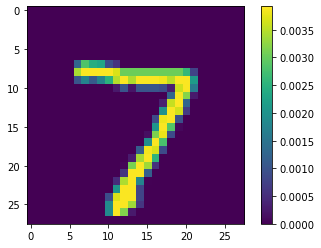

In [46]:
draw_test(0)

# 배포 실제 적용단계
    -손으로 쓴 이미지를 input_image(28*28)
    -()/255.0
    -model.predict(input_image)
    -결과값